<a href="https://colab.research.google.com/github/monimoyd/1stDNN/blob/master/mnist_99_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


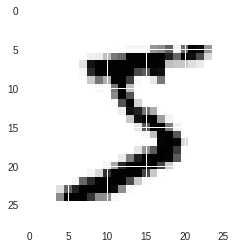

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import AveragePooling2D
from keras.layers import SeparableConv2D
model = Sequential()


model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(MaxPooling2D())
model.add(SeparableConv2D(32, (3, 3), activation='relu'))
model.add(SeparableConv2D(32, (3, 3), activation='relu'))
model.add(SeparableConv2D(32, (3, 3)))
model.add(SeparableConv2D(32, (3, 3)))
model.add(AveragePooling2D())
model.add(Convolution2D(10, 1))

model.add(Flatten())
model.add(Activation('softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
separable_conv2d_25 (Separab (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_26 (Separab (None, 22, 22, 64)        4736      
_________________________________________________________________
separable_conv2d_27 (Separab (None, 20, 20, 64)        4736      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
separable_conv2d_28 (Separab (None, 8, 8, 32)          1344      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=125, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/125
60000/60000 [==============================] - 278s 5ms/step - loss: 2.3019 - acc: 0.1098
Epoch 2/125
60000/60000 [==============================] - 274s 5ms/step - loss: 2.3014 - acc: 0.1124
Epoch 3/125
60000/60000 [==============================] - 273s 5ms/step - loss: 2.3012 - acc: 0.1124
Epoch 4/125
60000/60000 [==============================] - 272s 5ms/step - loss: 2.3012 - acc: 0.1124
Epoch 5/125
60000/60000 [==============================] - 277s 5ms/step - loss: 2.1897 - acc: 0.1900
Epoch 6/125
60000/60000 [==============================] - 286s 5ms/step - loss: 1.1812 - acc: 0.6178
Epoch 7/125
60000/60000 [==============================] - 283s 5ms/step - loss: 0.7314 - acc: 0.7734
Epoch 8/125
60000/60000 [==============================] - 271s 5ms/step - loss: 0.5148 - acc: 0.8409
Epoch 9/125
60000/60000 [==============================] - 269s 4ms/step - loss: 0.3989 - acc: 0.8778
Epoch 10/125
60000/60000 [==============================] - 270s 5ms/step - loss: 